# Prosper Loan Data Exploration


## Investigation Overview

> In this investigation, I wanted to look at the conditions of loans that could be used to predict the estimated return. The main focus was on the loan status, income range and borrower APR.

## Dataset Overview

> The data consisted of approximately 113,937 loans with 81 variables on each loan. This too much data to be analyzed which need to be reduction to focus only the affected factors on the estimated return. Select only data after July 2009 to detect Estimated Return without null values to get a new size of data which contains 84,964 loans and 14 factor.

In [1]:
#import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

dataset = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition

print(dataset.shape)
print(dataset.dtypes)
dataset.head(3)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0         0.158        0.138  ...         -133.18                0.0   
1         0.092        0.082  ...            0.00                0.0   
2         0.275        0.240  ...          -24.20                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  

[3 rows x 81 columns]

## Select smaller dataframe from the original dataset
This new dataframe explores a dataset containing prices and attributes for approximately 113,937 loans.

In [4]:
#dataframe called df to be used

df = dataset[['LoanNumber', 'LoanOriginationDate', 'LoanOriginalAmount', 'LoanStatus', 'Term', 'BorrowerAPR', 'BorrowerRate',
              'EstimatedLoss', 'EstimatedReturn', 'IncomeRange', 'IsBorrowerHomeowner',
              'CurrentDelinquencies', 'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent']]

In [5]:
#overview of data shape and composition

print(df.shape)
print(df.dtypes)
df.head()

(113937, 14)
LoanNumber                     int64
LoanOriginationDate           object
LoanOriginalAmount             int64
LoanStatus                    object
Term                           int64
BorrowerAPR                  float64
BorrowerRate                 float64
EstimatedLoss                float64
EstimatedReturn              float64
IncomeRange                   object
IsBorrowerHomeowner             bool
CurrentDelinquencies         float64
MonthlyLoanPayment           float64
LoanCurrentDaysDelinquent      int64
dtype: object


LoanNumber  LoanOriginationDate  LoanOriginalAmount LoanStatus  Term  \
0       19141  2007-09-12 00:00:00                9425  Completed    36   
1      134815  2014-03-03 00:00:00               10000    Current    36   
2        6466  2007-01-17 00:00:00                3001  Completed    36   
3       77296  2012-11-01 00:00:00               10000    Current    36   
4      102670  2013-09-20 00:00:00               15000    Current    36   

   BorrowerAPR  BorrowerRate  EstimatedLoss  EstimatedReturn     IncomeRange  \
0      0.16516        0.1580            NaN              NaN  $25,000-49,999   
1      0.12016        0.0920         0.0249          0.05470  $50,000-74,999   
2      0.28269        0.2750            NaN              NaN   Not displayed   
3      0.12528        0.0974         0.0249          0.06000  $25,000-49,999   
4      0.24614        0.2085         0.0925          0.09066       $100,000+   

   IsBorrowerHomeowner  CurrentDelinquencies  MonthlyLoanPayment  \
0                 True                   2.0              330.43   
1                False                   0.0              318.93   
2                False                   1.0              123.32   
3                 True                   4.0              321.45   
4                 True                   0.0              563.97   

   LoanCurrentDaysDelinquent  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [6]:
# Select only data after July 2009
# to detect Estimated Return without null values
# df will contain 84,964 loans.

df = df.query("LoanOriginationDate > '2009-07-31 00:00:00'")
df.shape

(84964, 14)

In [7]:
# Converting datatype of Term to string as it only has 3 cases (12, 36, 60)

df['Term'] = df.Term.astype(str)
df['IsBorrowerHomeowner'] = df.IsBorrowerHomeowner.astype(str)

In [8]:
# show LoanStatus values

df.LoanStatus.value_counts()

Current                   56576
Completed                 19768
Chargedoff                 5341
Defaulted                  1007
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [9]:
# Set all Past Due periods under the same name 'Past Due'

df.LoanStatus.replace({'Past Due (1-15 days)' : 'Past Due', 'Past Due (16-30 days)' : 'Past Due', 'Past Due (31-60 days)' : 'Past Due', 
                       'Past Due (61-90 days)' : 'Past Due', 'Past Due (91-120 days)' : 'Past Due', 'Past Due (>120 days)' : 'Past Due'}, inplace=True)
df.LoanStatus.value_counts()

Current                   56576
Completed                 19768
Chargedoff                 5341
Past Due                   2067
Defaulted                  1007
FinalPaymentInProgress      205
Name: LoanStatus, dtype: int64

In [10]:
# convert LoanStatus, IncomeRange and Term into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Completed','Chargedoff', 'Current', 'FinalPaymentInProgress', 'Defaulted', 'Past Due'],
                    'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed'], 
                    'Term': ['12', '36', '60']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [11]:
# descriptive statistics for numeric variables

df.describe()

LoanNumber  LoanOriginalAmount   BorrowerAPR  BorrowerRate  \
count   84964.000000        84964.000000  84964.000000  84964.000000   
mean    86533.288181         9077.376006      0.226603      0.195976   
std     28914.830500         6287.128429      0.079943      0.074653   
min     38063.000000         1000.000000      0.045830      0.040000   
25%     60864.750000         4000.000000      0.163240      0.135900   
50%     87733.500000         7500.000000      0.219450      0.187500   
75%    109069.250000        13500.000000      0.292540      0.257400   
max    136486.000000        35000.000000      0.423950      0.360000   

       EstimatedLoss  EstimatedReturn  CurrentDelinquencies  \
count   84837.000000     84837.000000          84964.000000   
mean        0.080307         0.096070              0.322254   
std         0.046755         0.030399              1.110550   
min         0.004900        -0.182700              0.000000   
25%         0.042400         0.074080              0.000000   
50%         0.072400         0.091700              0.000000   
75%         0.112000         0.116600              0.000000   
max         0.366000         0.283700             51.000000   

       MonthlyLoanPayment  LoanCurrentDaysDelinquent  
count        84964.000000               84964.000000  
mean           291.754773                  36.646285  
std            186.667933                 150.471354  
min              0.000000                   0.000000  
25%            157.300000                   0.000000  
50%            251.760000                   0.000000  
75%            388.280000                   0.000000  
max           2251.510000                1593.000000

## Distribution of Estimated Return

EstimatedRetun approximately seemed like a normal distribution, which has mean equal to the mode and median of the data set, which are around 0.1.

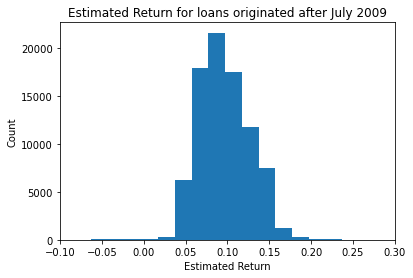

In [12]:
# Get the ticks for bins between [min-max], at an interval of 0.02
# we need to trim the plot by setting the upper and lower bounds of the bins that are displayed using xlim fun.

bins = np.arange(df['EstimatedReturn'].min(), df['EstimatedReturn'].max()+0.02, 0.02)
df.EstimatedReturn.plot(kind='hist', bins=bins)
plt.xlabel('Estimated Return')
plt.ylabel('Count')
plt.title("Estimated Return for loans originated after July 2009")
plt.xlim((-0.1,0.3));

## Distribution of Loan Original Amount

For the LoanOriginalAmount, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 3,750, 10,000, 15,000); frequency quickly trails off until the next spike.

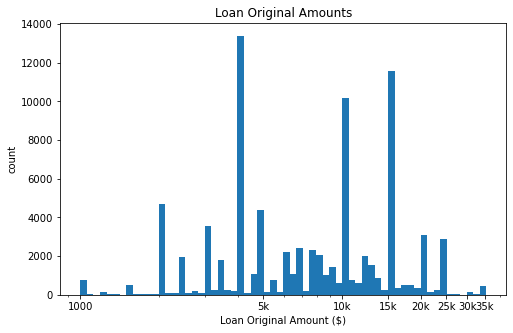

In [13]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 5e3, 10e3, 15e3, 2e4, 2.5e4, 3e4, 3.5e4], [1000, '5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.title('Loan Original Amounts')
plt.show()

## Estimated Return vs. Borrower APR

This strongly correlated plot suggests that for the Borrower APR less than 20% this grantee no estimated loss and for cases larger than 20% may cause loss to -0.1 in estimated return and may cause gain up to 0.3 too.

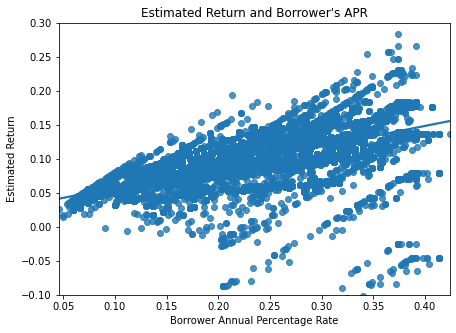

In [14]:
#Bivariate Exploration -- Using regplot plot to find the relation btween two Quantitative variables
#                         BorrowAPR and EstimatedReturn which are strongly correlated

plt.figure(figsize=(7,5))
sb.regplot(data = df, x = 'BorrowerAPR', y = 'EstimatedReturn');
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Estimated Return')
plt.title("Estimated Return and Borrower's APR")
plt.ylim(-0.1,0.3);

## Estimated Return across Income Ranges

The EstimatedReturn for who Not Employed or have low income is much higher than who have large income, that may mean that low income make people more interest getting loan to start their own business.

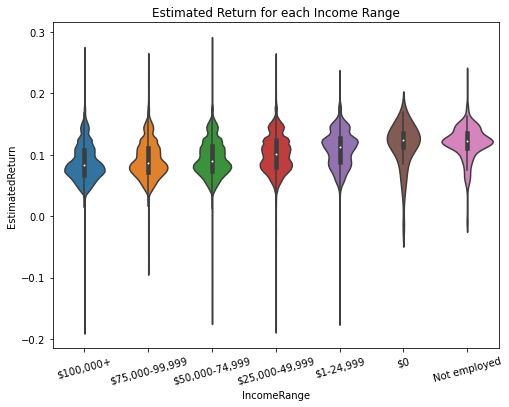

In [15]:
#Bivariate Exploration -- Use Violin plot to demonstrate the data at different levels of income range
# plot the categorical variable 'IncomeRange' against EstimatedReturn

plt.figure(figsize=(8,6))
sb.violinplot(data=df, x='IncomeRange', y='EstimatedReturn', innner=None)
plt.xticks(rotation=15)
plt.title('Estimated Return for each Income Range');

## Loan Term levels over Income Ranges and Loan Status

The most popular term in the data set 36 month, here which appeared used by who have medium income and current loans.

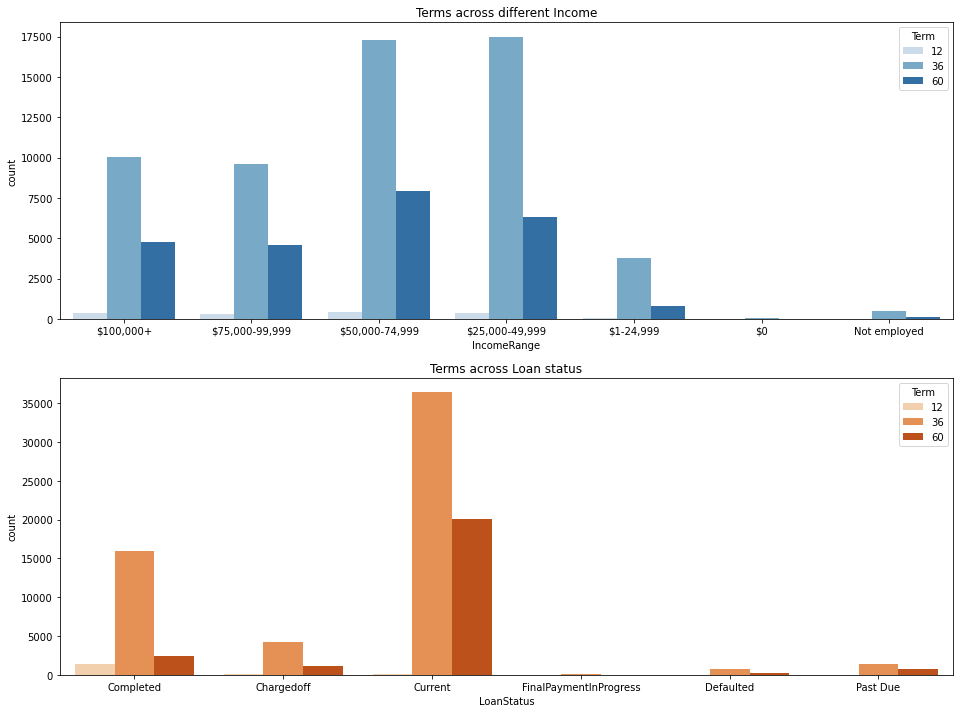

In [16]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [16, 12])

# subplot 1: IncomeRange vs Term
plt.subplot(2, 1, 1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'Blues')
plt.title('Terms across different Income')

# subplot 2: LoanStatus vs. Term
ax = plt.subplot(2, 1, 2)
sb.countplot(data = df, x = 'LoanStatus', hue = 'Term', palette = 'Oranges')
plt.legend(title= 'Term', ncol = 1) # re-arrange legend to reduce overlapping
plt.title('Terms across Loan status')

plt.show()

## Estimated Return, Loan Status and Terms levels

The estimated return from the completed loans was higher for those had the loan over 60 and the same appeared for the chargedoff loans. For the current loans, the estimated return is Convergent for both terms 60 and 36. For loans that their final payment in progress gave lower estimated return than the completed and chargedoff loans.

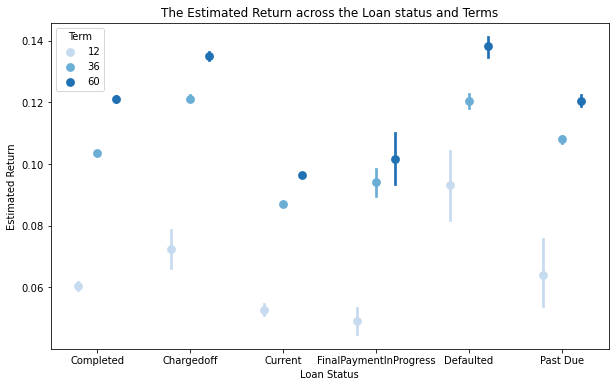

In [17]:
fig = plt.figure(figsize = [10,6])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Estimated Return across the Loan status and Terms')
plt.ylabel('Estimated Return')
plt.xlabel('Loan Status')
plt.show();